In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Background and Problem Statement

**Background**

Airbnb has emerged as one of the most popular accommodation rental platforms worldwide, including in Bangkok, Thailand. This city is renowned as an attractive tourist destination, featuring a variety of attractions, a rich cultural heritage, and a vibrant nightlife. With the increasing number of travelers seeking alternative accommodations, many property owners in Bangkok have begun to utilize the Airbnb platform to rent out their spaces, whether they be apartments, houses, or private rooms. However, with the abundance of options available, competition among hosts has intensified. Consequently, property owners need to understand the factors that influence rental prices across different neighborhoods and room types, making accurate pricing essential for attracting guests and maximizing revenue.

**Problem Statement**

Despite the fact that many property owners in Bangkok have registered on Airbnb, there remains a gap in their understanding of how rental prices are affected by location and room type. The primary question that arises is: 

**"How does the relationship between pricing in various neighborhoods and room types assist hosts in optimizing their listings and pricing strategies?"** 

This problem statement encompasses several key aspects, such as the variation in prices across different neighborhoods that can influence demand and rental rates, as well as the types of rooms offered that contribute to pricing. By comprehending the relationship between location, room type, and pricing, property owners can develop more effective pricing strategies that not only attract more guests but also enhance revenue. This research aims to provide valuable insights for property owners in Bangkok to optimize their listings and improve their competitiveness in the Airbnb market.

In [3]:
df_airbnb = pd.read_csv('Airbnb Listings Bangkok.csv')
df_airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


# Data Understanding and Cleaning

## Data Understanding

Airbnb Listings Bangkok Data Dictionary:
- id = Airbnb's unique identifier for the listing.
- name = Name of the listing.
- host_id = Airbnb's unique identifier for the host/user.
- host_name = Name of the host. Usually, just the first name(s).
- neighborhood = geocoded using the latitude and longitude against neighborhoods.
- latitude = Uses the World Geodetic System (WGS84) projection.
- longitude = Uses the World Geodetic System (WGS84) projection.
- room_type = Four types of room; Entire home/apt, Private room, Shared room, Hotel.
- price = Daily price in local currency.
- minimum_nights = The minimum number of night stays for the listing.
- number_of_reviews = The number of reviews the listing has.
- last_review = The date of the last/newest review.
- calculated_host_listings_count = The number of listings the host has in the current scrape in the city/region geography.
- availability_365 = The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm = The number of reviews the listing has (in the last 12 months).

In [4]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [5]:
df_airbnb[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [6]:
df_airbnb.describe(include=object)

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


**Insight:**
1. The Airbnb Listings dataset for Bangkok consists of 17 columns and contains 15,854 rows. There are 12 columns classified as numerical (int64 and float64) and 5 columns classified as categorical (object).
2. Several columns contain missing values, specifically the columns: name, host_name, last_review, and review_per_month. These columns require further handling to address the missing data.
3. The column labeled "Unnamed: 0" is a duplicate of the index and can be removed from the dataset.
4. The data format in the column last_review is currently of type object. This column needs to be converted to a datetime format.

## Data Cleaning

In [7]:
# drop Unnamed: 0
df_airbnb = df_airbnb.drop(columns = ['Unnamed: 0'])
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


To examine the data with a price of 0, as listings with a price of 0 are not valid for rental purposes.

In [8]:
df_airbnb[df_airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


As we can see, at id = 44563108, the price is 0, the availability in a year is zero, and not reviewed yet. 
So, we can delete this data because we can assume that this airbnb is not active.

In [9]:
index_to_drop = df_airbnb[df_airbnb['price'] == 0].index[0]
df_airbnb = df_airbnb.drop(index_to_drop)
df_airbnb[df_airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


### Data Distribution

In [10]:
df_airbnb.nunique()

id                                15853
name                              14793
host_id                            6658
host_name                          5311
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3039
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

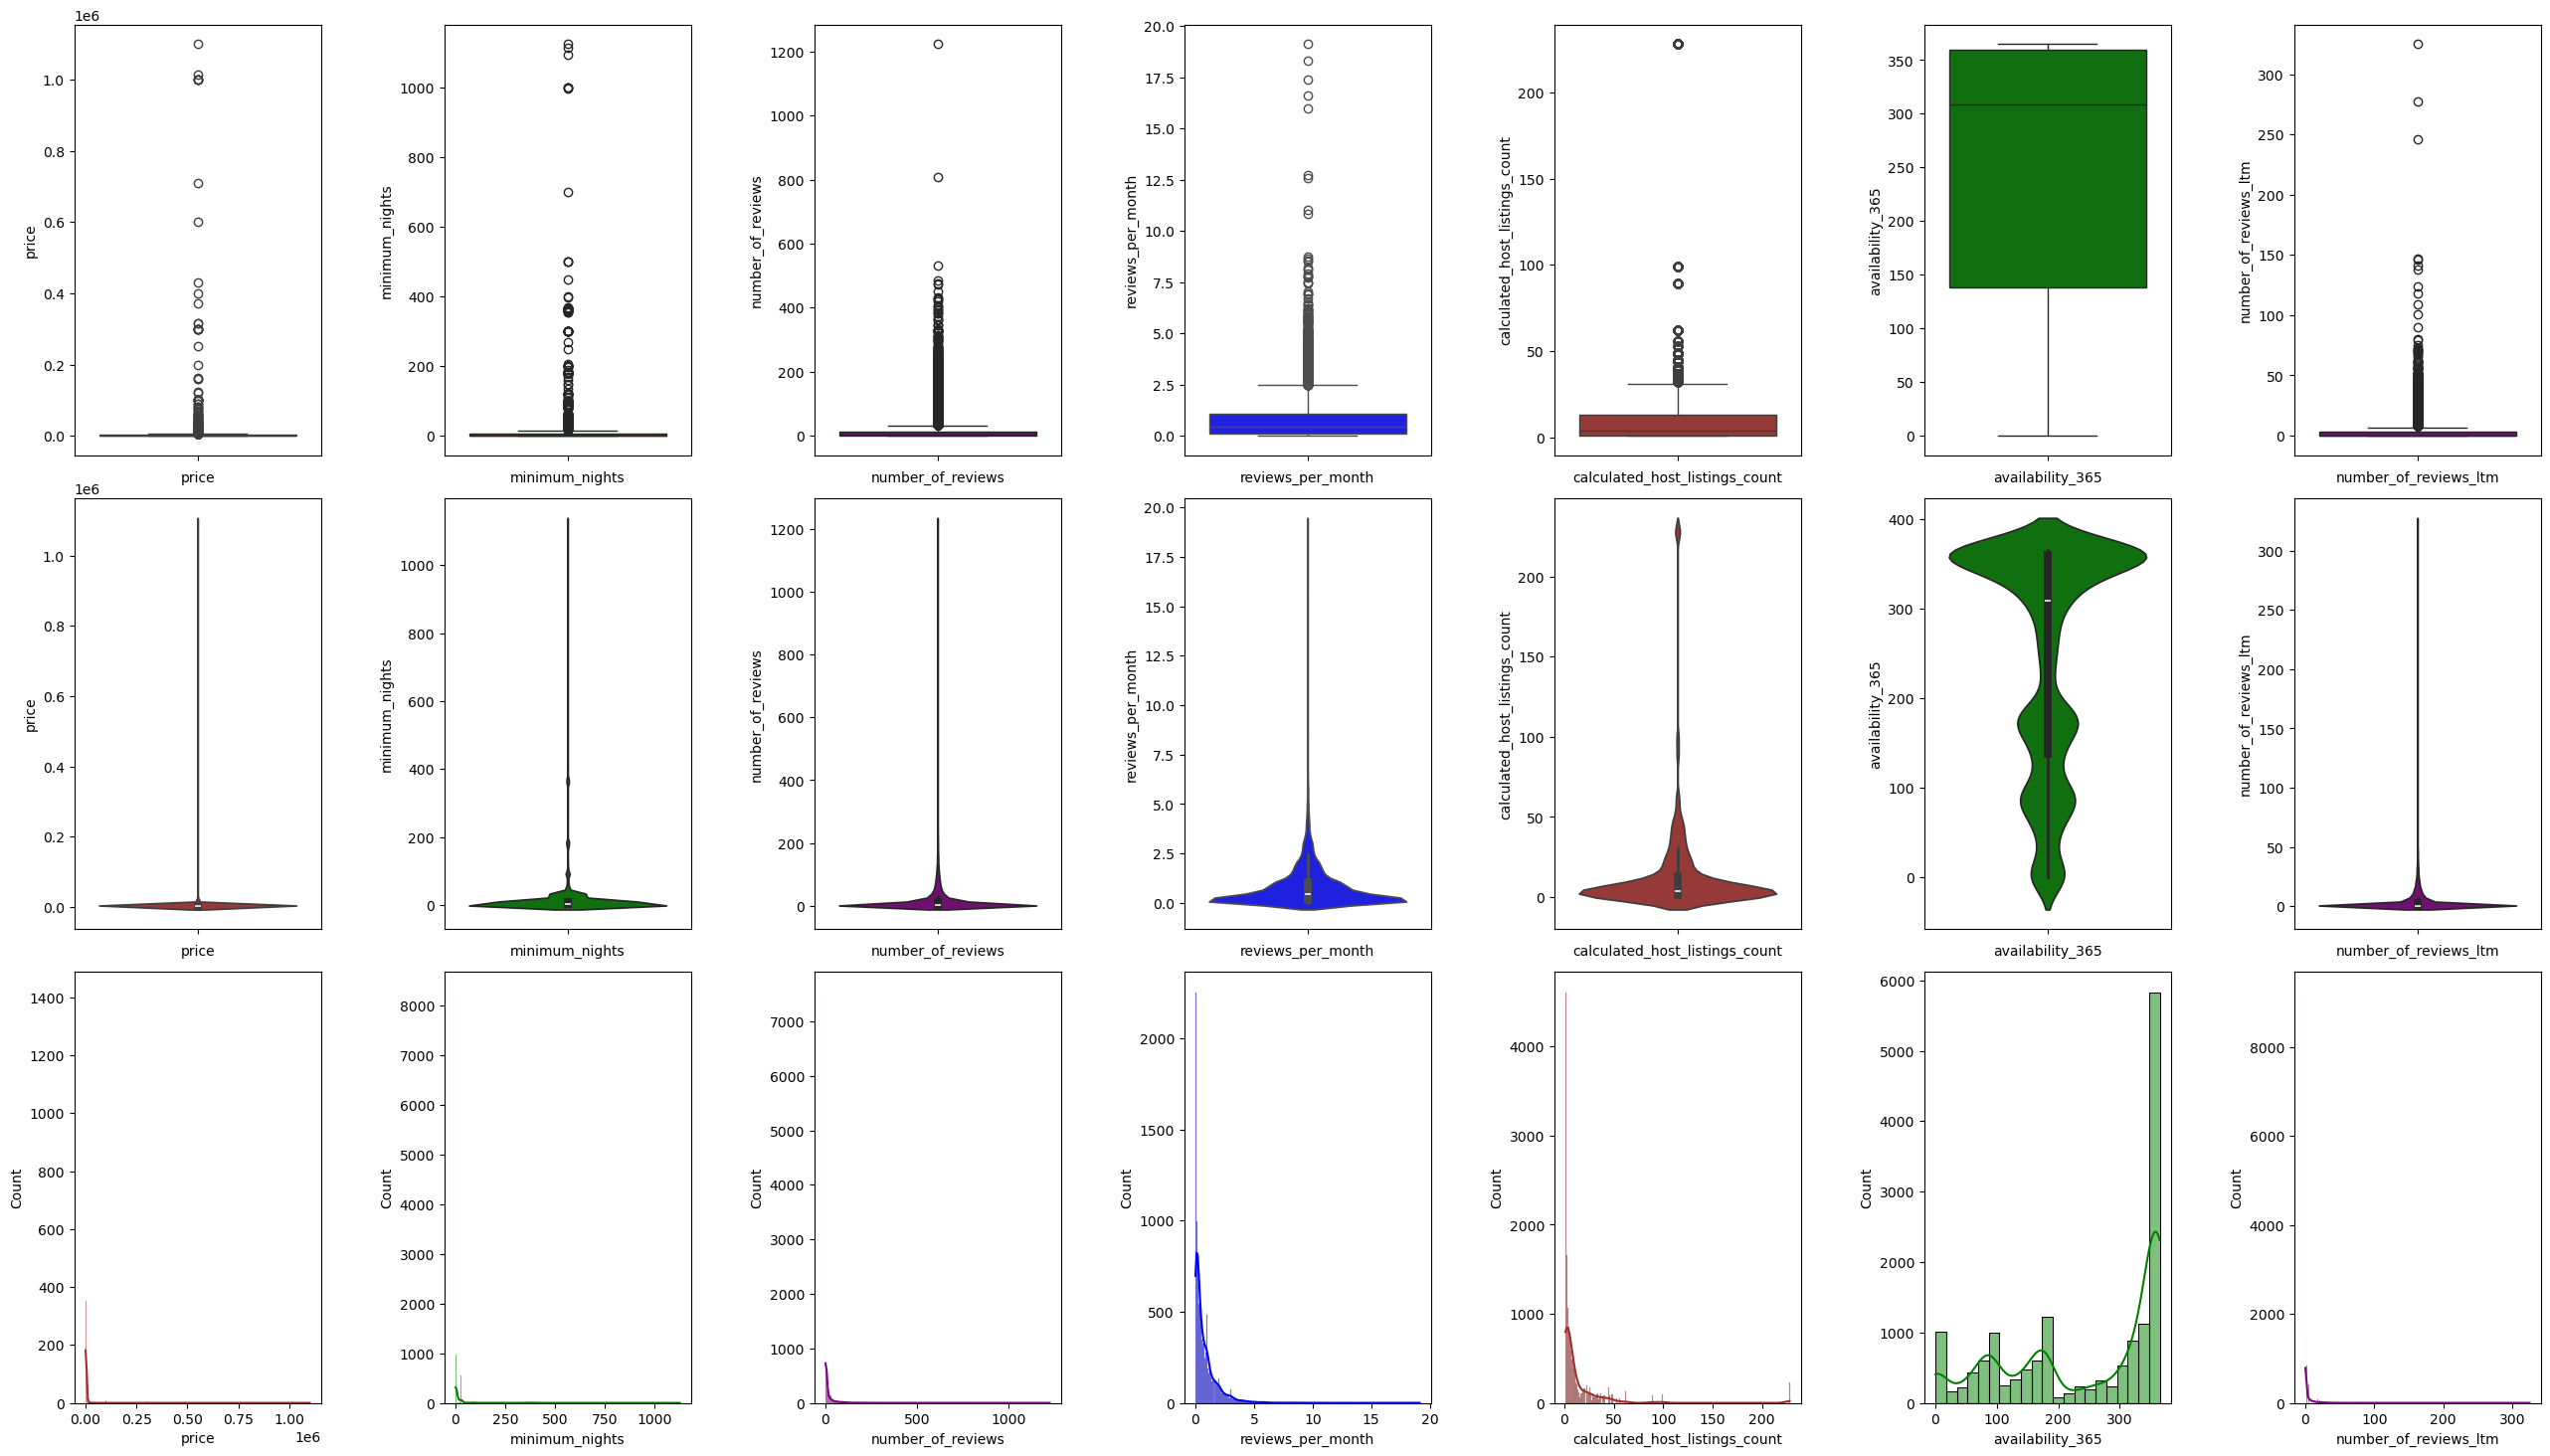

In [11]:
# data distribution except the unique data, such as id, name, host_id, host_name, neighbourhood, latitude, longitude, and room_type

df_grouped = df_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

data_df = df_grouped.select_dtypes(include=['int', 'float'])

fig, ax = plt.subplots(3, data_df.shape[1], figsize=(32, 18))
plt.subplots_adjust(wspace=0.5, hspace=0.1)
colors = ['brown', 'green', 'purple', 'blue']

# Boxplots
for i, col in enumerate(data_df.columns):
    sns.boxplot(data=data_df[col], ax=ax[0, i], color=colors[i % 4])
    ax[0, i].set_xlabel(col)
    ax[0, i].set_xticklabels([])

# Violin plots
for i, col in enumerate(data_df.columns):
    sns.violinplot(data=data_df[col], ax=ax[1, i], color=colors[i % 4])
    ax[1, i].set_xlabel(col)
    ax[1, i].set_xticklabels([])

# Histograms
for i, col in enumerate(data_df.columns):
    sns.histplot(data=data_df[col], ax=ax[2, i], kde=True, color=colors[i % 4])
    ax[2, i].set_xlabel(col)

plt.show()

All of the aforementioned columns exhibit a positive skew in their data distribution, except for the column availability_365.

### Handling Missing Value

In [12]:
df_airbnb.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [13]:
missing_name = df_airbnb['name'].isnull().sum()
missing_host_name = df_airbnb['host_name'].isnull().sum()
missing_last_review = df_airbnb['last_review'].isnull().sum()
missing_reviews_per_month = df_airbnb['reviews_per_month'].isnull().sum()

percent_missing_name = (missing_name / len(df_airbnb)) * 100
percent_missing_host_name = (missing_host_name / len(df_airbnb)) * 100
percent_missing_last_review = (missing_last_review / len(df_airbnb)) * 100
percent_missing_reviews_per_month = (missing_reviews_per_month / len(df_airbnb)) * 100

print("Persentase missing value pada kolom 'name': {:.2f}%".format(percent_missing_name))
print("Persentase missing value pada kolom 'host_name': {:.2f}%".format(percent_missing_host_name))
print("Persentase missing value pada kolom 'last_review': {:.2f}%".format(percent_missing_last_review))
print("Persentase missing value pada kolom 'reviews_per_month': {:.2f}%".format(percent_missing_reviews_per_month))

Persentase missing value pada kolom 'name': 0.05%
Persentase missing value pada kolom 'host_name': 0.01%
Persentase missing value pada kolom 'last_review': 36.52%
Persentase missing value pada kolom 'reviews_per_month': 36.52%


**Insight**
1. The columns "name" and "host_name" have a small percentage of missing values, specifically 0.05% and 0.01%, respectively. While both columns can be dropped, they should be analyzed first.
2. The columns "last_review" and "reviews_per_month" have the same percentage of missing values.

**Handling name column**

In [14]:
df_airbnb[df_airbnb['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [15]:
df_airbnb[df_airbnb['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Pakaphol has two other listings with the same name, allowing us to assume that the listing with ID = 13142743, owned by Pakaphol, shares the same name.

In [16]:
df_airbnb.loc[2075, 'name'] = df_airbnb[df_airbnb['host_name'] == 'Pakaphol']['name'].mode()[0]
df_airbnb[df_airbnb['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Data other than the host_name 'Pakaphol' can be removed.

In [17]:
df_airbnb = df_airbnb.dropna(subset=['name'])

**Handling host_name column**

In [18]:
df_airbnb[df_airbnb['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


After analysis, the listing with ID = 19682464 does not share the same name or host_id with any other data, allowing for its removal.

In [19]:
df_airbnb = df_airbnb.dropna(subset=['host_name'])

**Handling 'last_review' and 'reviews_per_month' column**

<Axes: >

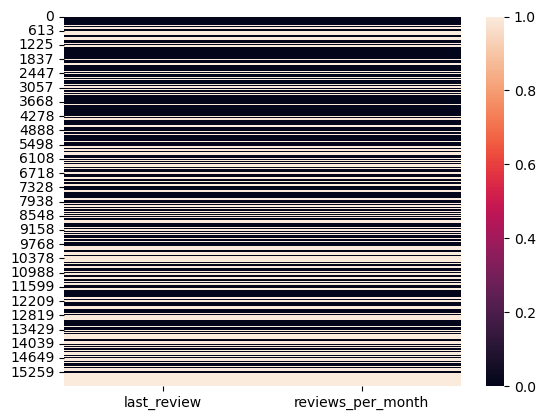

In [20]:
# last_review and reviews_per_month missing value
sns.heatmap(df_airbnb[['last_review','reviews_per_month']].isna())

In [21]:
df_airbnb[df_airbnb['last_review'].isna()]['number_of_reviews'].unique()

array([0], dtype=int64)

In [22]:
df_airbnb[df_airbnb['reviews_per_month'].isna()]['number_of_reviews'].unique()

array([0], dtype=int64)

NaN value in last_review and reviews_per_month column has 0 number_of_reviews. In conclusion, the value is NaN because there's no review for the airbnb listings yet.

In [23]:
df_airbnb['last_review'] = df_airbnb['last_review'].fillna('Not Reviewed')
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)

In [24]:
df_airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Duplicated Data

In [25]:
df_airbnb.duplicated().sum()

0

There's no duplicated data in the Airbnb Listings Bangkok data.

### Datetime Format

In last_review column, date data is in object format. Change it to datetime format.

In [26]:
df_airbnb['last_review'] = df_airbnb['last_review'].replace("Not Reviewed", pd.NaT)
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')

## Saving Clean Data

In [27]:
df_airbnb.to_csv('Airbnb Listings Bangkok Clean.csv')

# Data Analysis

As the problem has been previously stated:

"How does the relationship between pricing in various neighbourhoods and room types assist hosts in optimizing their listings and pricing strategies?"

To address this problem, the analysis will focus on room type and neighbourhood. Additionally, a comprehensive analysis will also be conducted on reviews and time to observe the growth of Airbnb.
1. Room type analysis
2. Neighbourhood analysis
3. Review analysis 
4. Time analysis

**Room type analysis**

1. Room type distribution
2. Average price for each room type
3. Total reviews for each room type
4. Room type in each neighbourhood listings

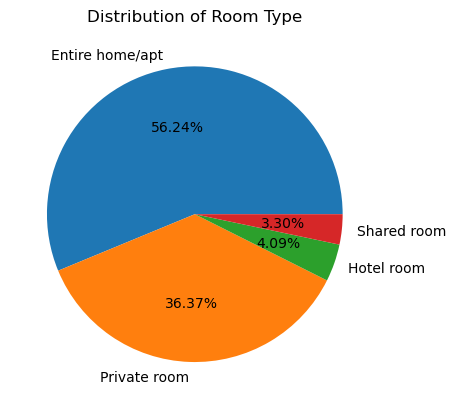

In [28]:
# Room type distribution

room_type_counts = df_airbnb['room_type'].value_counts()
room_type_percentages = room_type_counts / len(df_airbnb) * 100
plt.pie(room_type_percentages, labels=room_type_percentages.index, autopct='%1.2f%%')
plt.title('Distribution of Room Type')
plt.show()

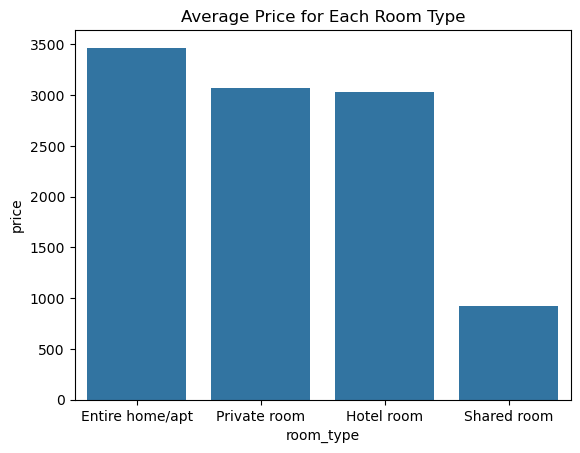

In [29]:
# Average price for each room type

sns.barplot(data = df_airbnb, x = 'room_type', y = 'price', estimator = np.mean, errorbar=('ci', 0))
plt.title('Average Price for Each Room Type')
plt.show()

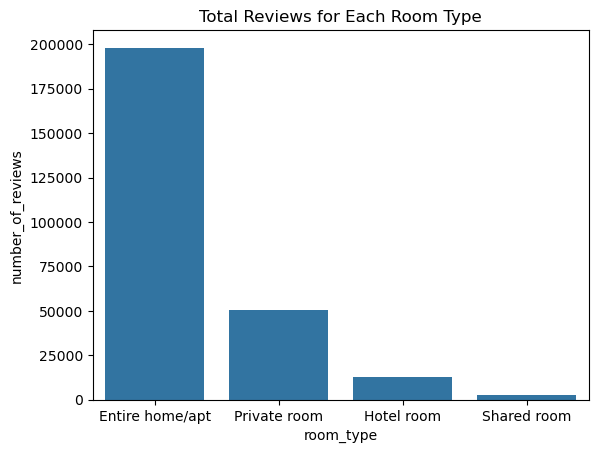

In [30]:
# Total reviews for each room type

sns.barplot(data = df_airbnb, x = 'room_type', y = 'number_of_reviews', estimator = np.sum, errorbar=('ci', 0))
plt.title('Total Reviews for Each Room Type')
plt.show()

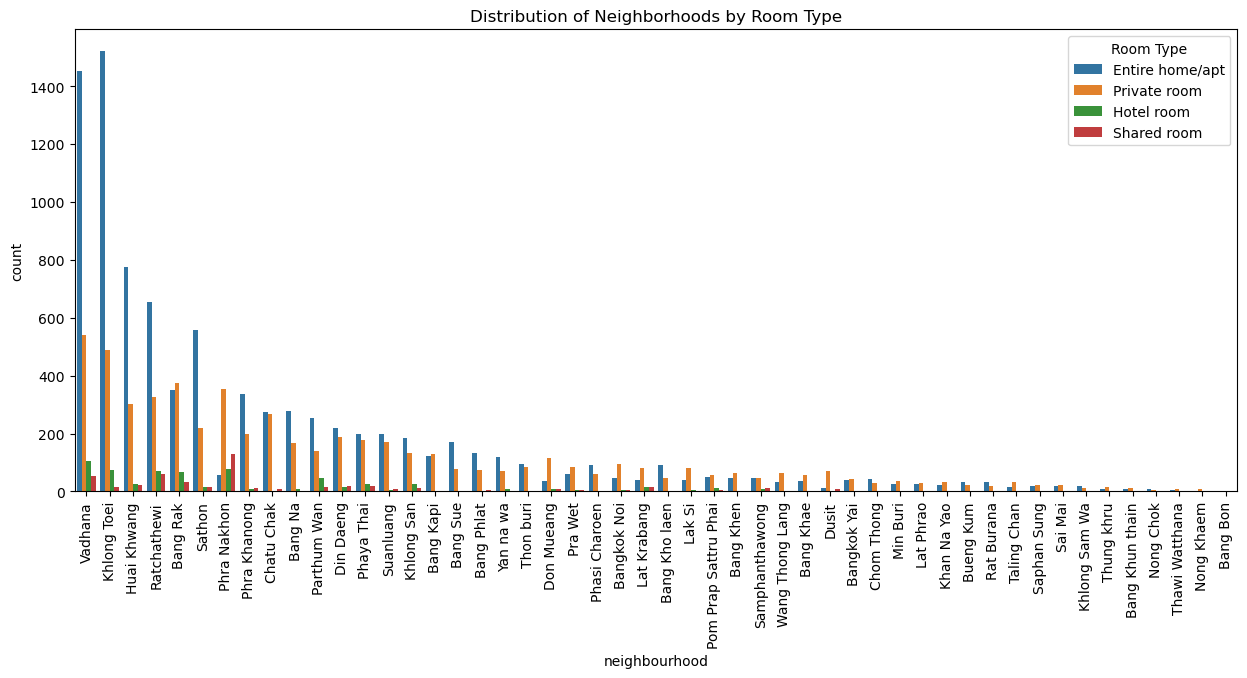

In [31]:
# Room type in each neighbourhood listings
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df_airbnb, x='neighbourhood', hue='room_type', order=df_airbnb['neighbourhood'].value_counts().index)
abs_values = df_airbnb['neighbourhood'].value_counts(ascending=False).values
plt.title('Distribution of Neighborhoods by Room Type')
plt.xticks(rotation=90)
plt.legend(title='Room Type')
plt.show()

**Insight:**
1. The most available listing type on Airbnb is Entire home/apt, which accounts for 56.24%, while the least available is Shared room at 3.30%.
2. In terms of pricing, the Entire home/apt type has the highest average price because it offers the entire place for the renter. The Shared room type has the lowest average price as it involves sharing the entire space with others.
3. Entire home/apt has the highest number of reviews due to its significantly greater availability compared to other listing types. Additionally, this indicates that the Entire home/apt listing type is very popular compared to other types of listings.
4. In the neighborhoods of Vadhana, Khlong Toei, Huai Khwang, and Ratchathewi, the most common room type is "Entire home/apt". However, in the neighborhood of Bang Rak, the most common room type is "Private room". This location is close to downtown Bangkok, suggesting that location influences the abundance and type of room types.

**Neighbourhood Analysis**

1. Neighbourhood distribution
2. Average price at each neighbourhood
3. Total reviews in the neighbourhood
4. Listings neighbourhood in map

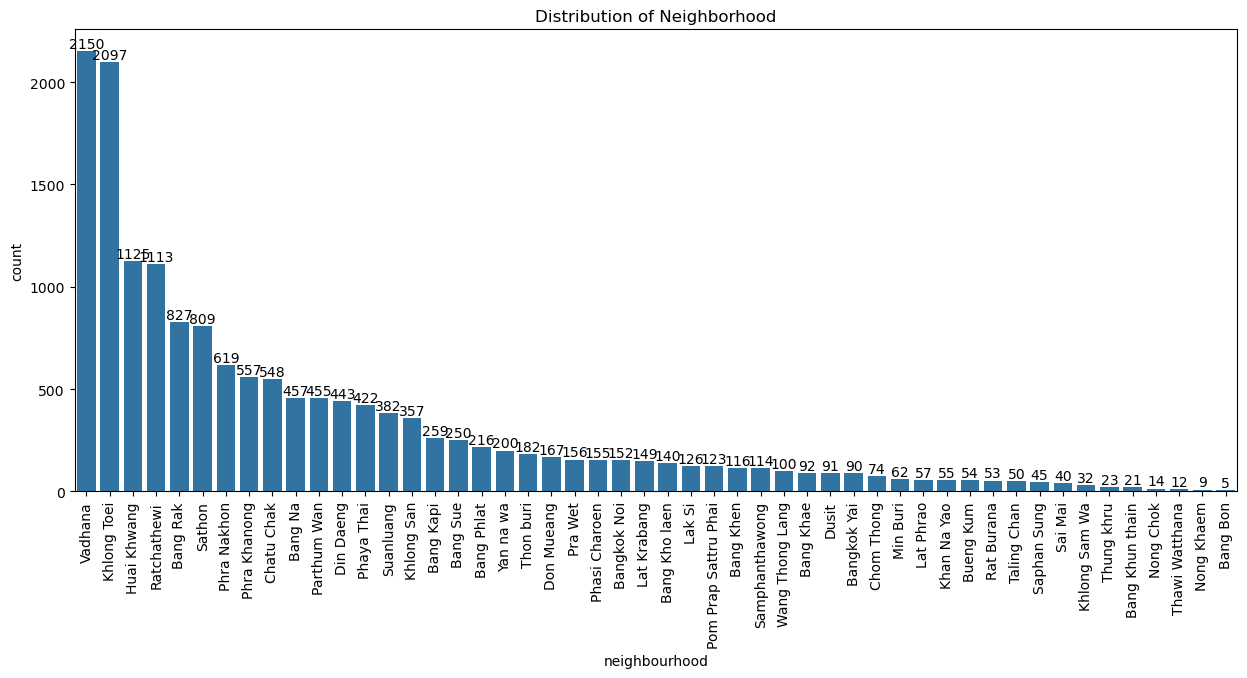

In [32]:
# Neighbourhood distribution
plt.figure(figsize=(15, 6))
ax = sns.countplot(data = df_airbnb, x = 'neighbourhood', order = df_airbnb['neighbourhood'].value_counts().index)
abs_values = df_airbnb['neighbourhood'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Distribution of Neighborhood')
plt.xticks(rotation=90)
plt.show()

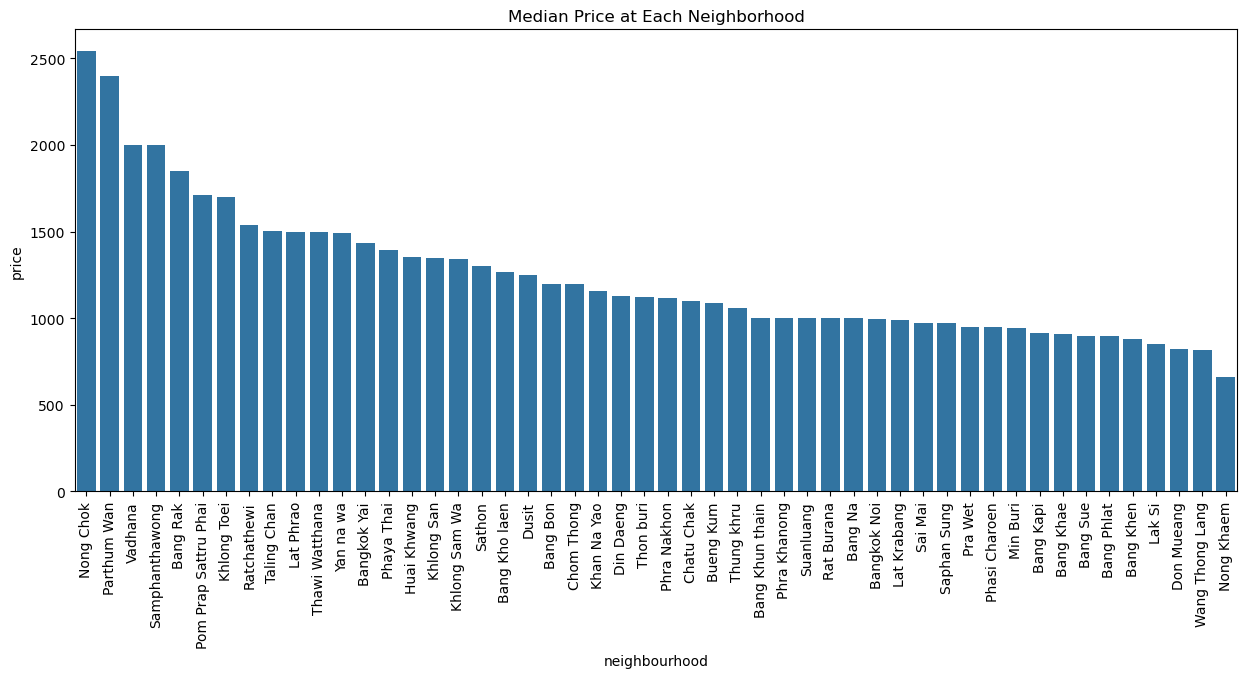

In [33]:
# Median price at each neighbourhood
# Using median because the distribution of price is not normal
average_price = df_airbnb.groupby('neighbourhood')['price'].median().reset_index()
average_price_sorted = average_price.sort_values(by='price', ascending=False)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data = average_price_sorted, x = 'neighbourhood', y = 'price', estimator = np.median, errorbar=('ci', 0))
plt.title('Median Price at Each Neighborhood')
plt.xticks(rotation=90)
plt.show()

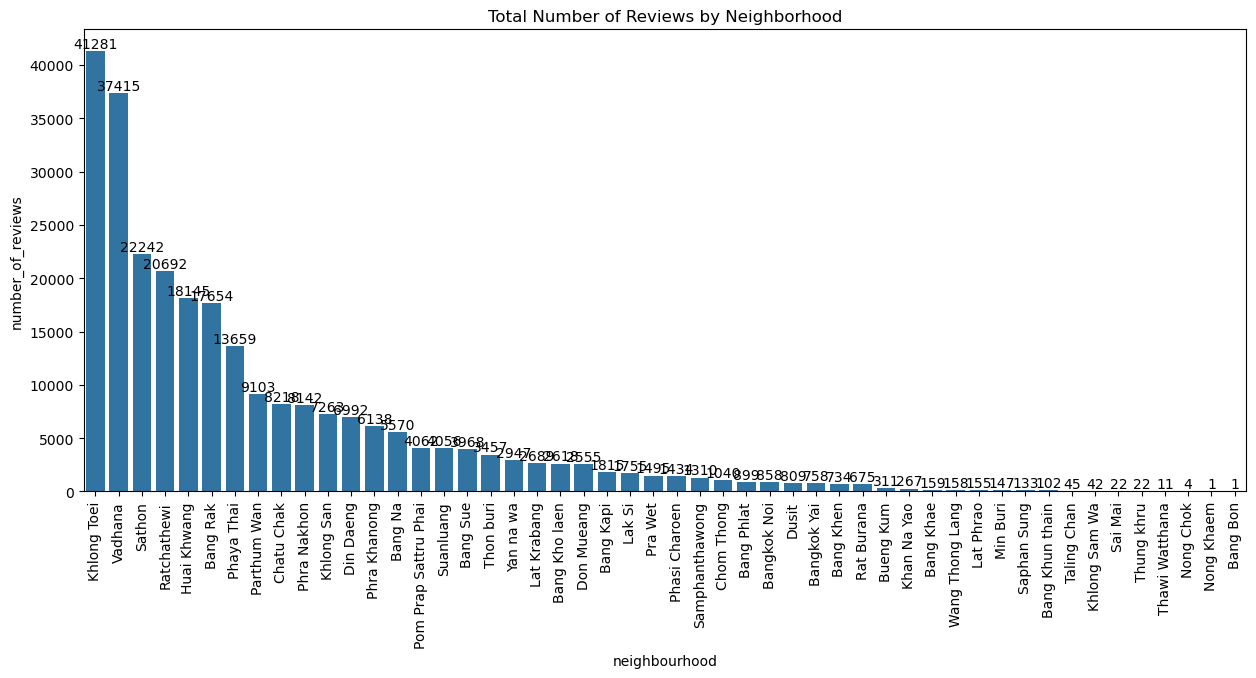

In [44]:
# Total reviews in the neighbourhood

reviews_count = df_airbnb.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
reviews_count_sorted = reviews_count.sort_values(by='number_of_reviews', ascending=False)
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=reviews_count_sorted, x='neighbourhood', y='number_of_reviews', order=reviews_count_sorted['neighbourhood'])
abs_values = reviews_count_sorted['number_of_reviews'].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Total Number of Reviews by Neighborhood')
plt.xticks(rotation=90)
plt.show()

In [35]:
# Listings neighbourhood in map

import folium
from folium.plugins import HeatMap

# Calculate frequency per neighborhood
neighborhood_freq = df_airbnb['neighbourhood'].value_counts()

# Create a map centered around the mean latitude and longitude
mean_lat = df_airbnb['latitude'].mean()
mean_lon = df_airbnb['longitude'].mean()
map = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Get the mean latitude and longitude per neighborhood for heatmap
heatmap_data = []
for neighborhood, count in neighborhood_freq.items():
    subset = df_airbnb[df_airbnb['neighbourhood'] == neighborhood]
    neighborhood_lat = subset['latitude'].mean()
    neighborhood_lon = subset['longitude'].mean()
    heatmap_data.append([neighborhood_lat, neighborhood_lon, count])

# Create a HeatMap with booking frequencies per neighborhood
HeatMap(heatmap_data).add_to(map)

# Add markers for each neighborhood
for neighborhood, count in neighborhood_freq.items():
    subset = df_airbnb[df_airbnb['neighbourhood'] == neighborhood]
    neighborhood_lat = subset['latitude'].mean()
    neighborhood_lon = subset['longitude'].mean()
    folium.Marker(
        location=[neighborhood_lat, neighborhood_lon],
        popup=neighborhood,
        icon=folium.Icon(color='blue')
    ).add_to(map)

# Display the map
map

**Insight:**
1. The most listings are in Vadhana with a total of 2149, followed by Khlong Toei with 2097. The least listings are in Bang Bon with only 5. This is because Vadhana and Khlong Toei are close to the city center and Bang Bon is far away from the city center.
2. Based on the price, Nong Chok has the highest price followed by Parthum Wan. The district with the lowest price is Nong Khaem.
3. Khlong Toei has the highest number of reviews followed by Vadhana. This indicates that the district has the most visitors compared to the other districts. Bang Bon and Nong Khaem districts are the districts with the fewest visitors.
4. Based on the map, you can see that the neighborhoods closest to the city center have the most listings, specifically the Vadhana and Khlong Toei districts.

**Reviews Analysis**

Relationship between price and number of reviews.

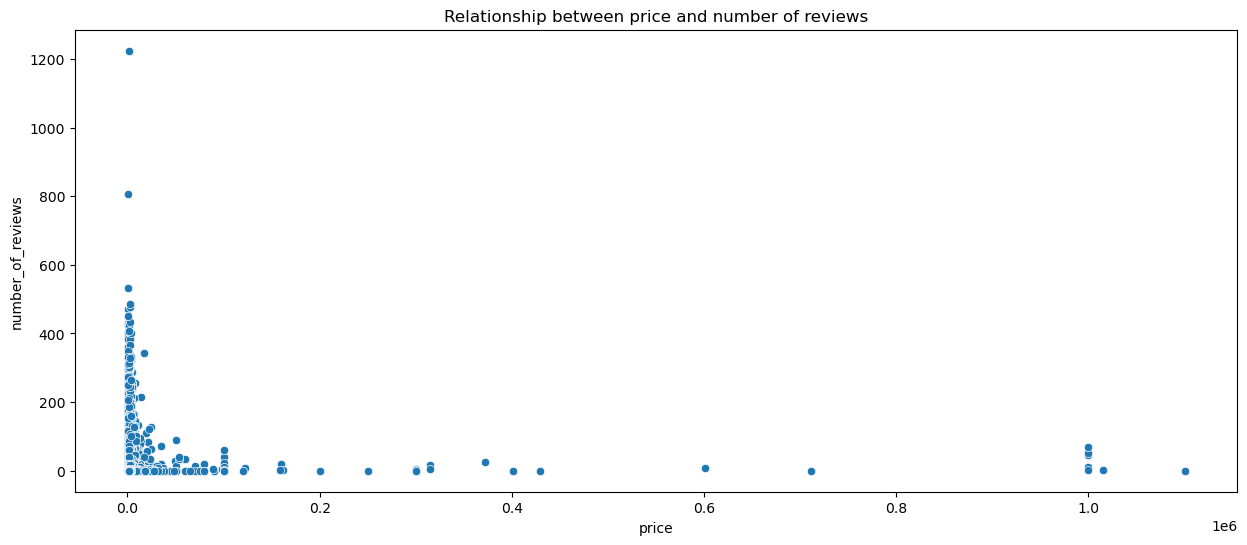

In [45]:
# Relationship between price and number of reviews

plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_airbnb, x = 'price', y = 'number_of_reviews')
plt.title('Relationship between price and number of reviews')
plt.show()

In [37]:
# correlation between number_of_reviews and price using spearman because the data is not 
df_airbnb['number_of_reviews'].corr(df_airbnb['price'], method='spearman')

-0.02072598663200993

**Insight:**

The number of reviews and price columns have a low correlation. But visually, it can be seen that lower prices have a greater number of reviews.

**Time Analysis**

1. Yearly review frequencies
2. Monthly review frequencies

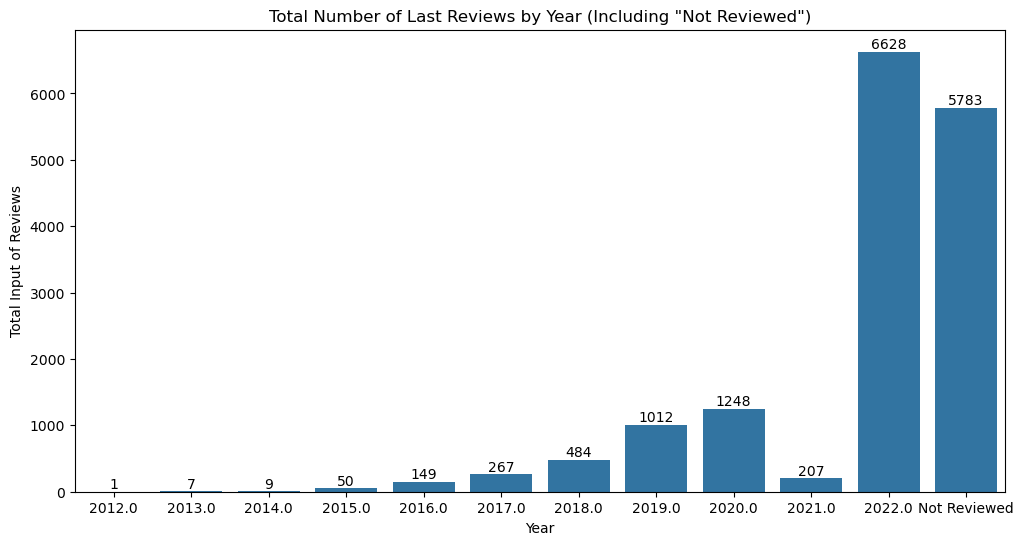

In [38]:
# Yearly review input frequencies

df_airbnb['year'] = df_airbnb['last_review'].dt.year
valid_reviews = df_airbnb.groupby('year')['last_review'].count().reset_index(name='count')
not_reviewed_count = df_airbnb['last_review'].isna().sum()
not_reviewed_df = pd.DataFrame({'year': ['Not Reviewed'], 'count': [not_reviewed_count]})
total_reviews = pd.concat([valid_reviews.rename(columns={'count': 'count'}), not_reviewed_df], ignore_index=True)

# Barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_reviews, x='year', y='count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Total Number of Last Reviews by Year (Including "Not Reviewed")')
plt.xlabel('Year')
plt.ylabel('Total Input of Reviews')
plt.show()


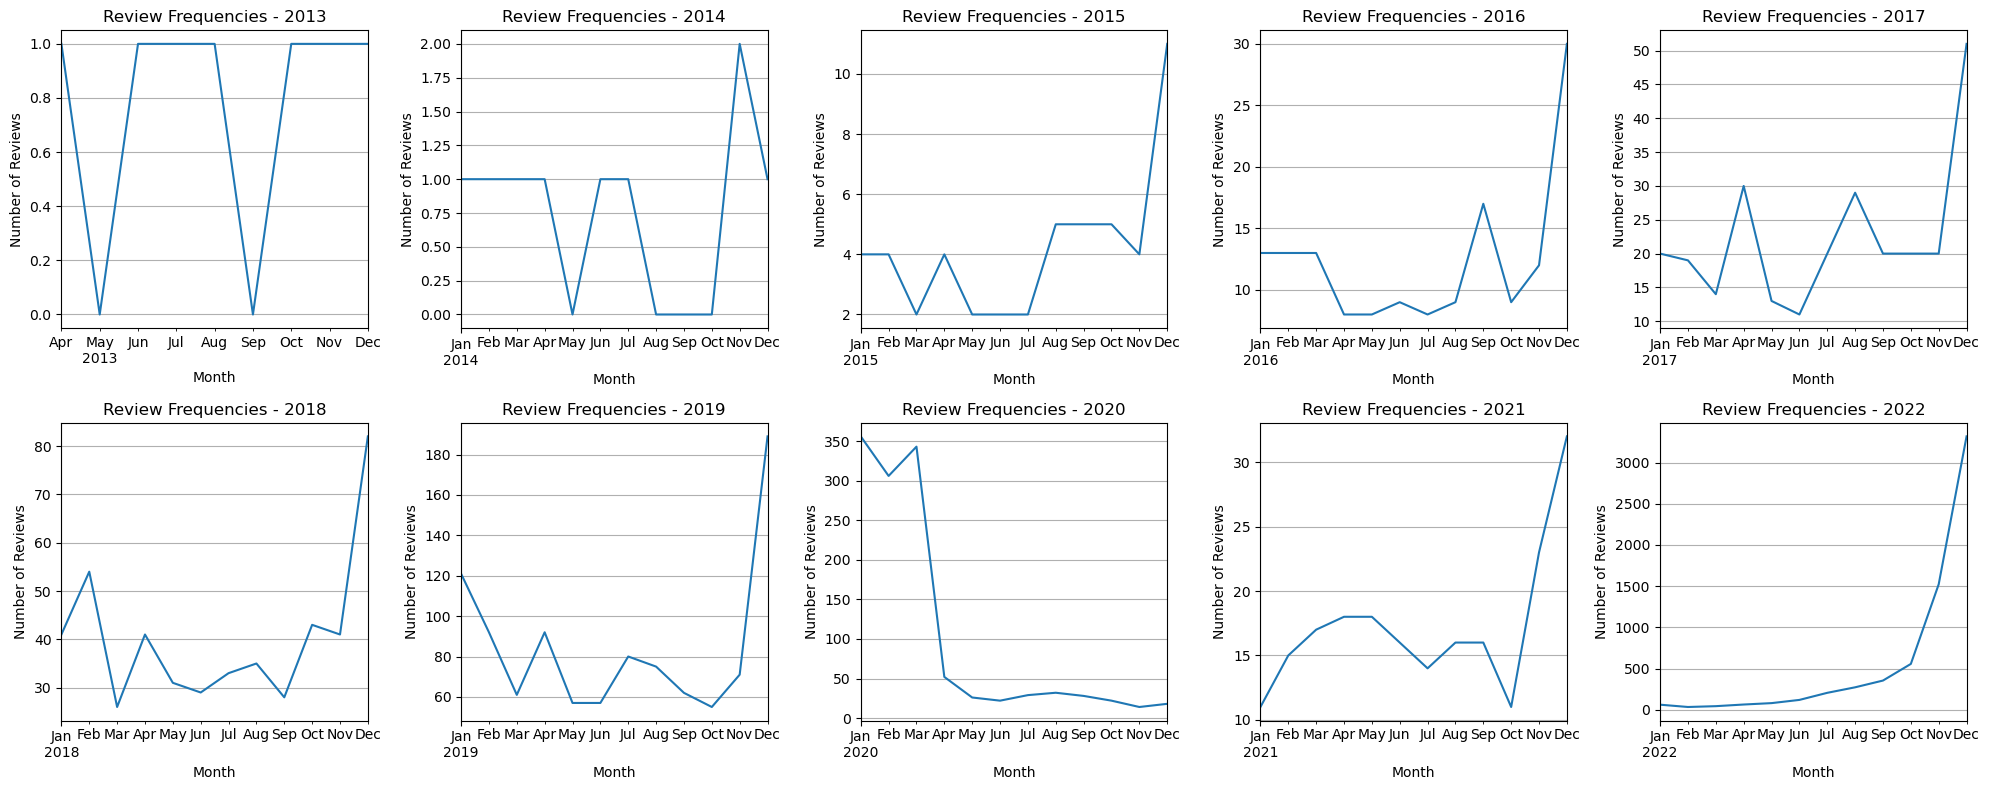

In [47]:
# Monthly review frequencies

df_copy = df_airbnb.copy()
df_filtered2 = df_copy[(df_copy['last_review'].dt.year >= 2013) & (df_copy['last_review'].dt.year <= 2022)]

# Create subplots for each year
years = range(2013, 2023)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, year in enumerate(years):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    bookings_over_time = df_filtered2[df_filtered2['last_review'].dt.year == year].resample('ME', on='last_review').size()
    bookings_over_time.plot(ax=ax, title=f'Review Frequencies - {year}', legend=False)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Reviews')
    ax.grid(True)

plt.tight_layout()
plt.show()

**Insight:**
1. The year 2022 has the highest number of review inputs, followed by Not Reviewed. In 2020, there was a decrease in reviews, indicating a decline in Airbnb renters. This can be attributed to many factors such as the COVID-19 pandemic and the economic downturn caused by the pandemic. In addition, the high number of 'Not Reviewed' indicates a mismatch in Airbnb listings, both in location, price, and room type.
2. The number of reviews increases from the end of the year to the beginning of the year, namely November, December, January, and February. This is due to the holiday season and the cooler temperatures in Bangkok.

## Conclusion

1. **Room Type Popularity**: The analysis indicates that "Entire home/apt" is the most popular listing type on Airbnb in Bangkok, accounting for over half of the listings. This suggests that travelers prefer having an entire space to themselves, which can influence hosts to focus on this type of listing to maximize occupancy and revenue.

2. **Pricing Variability by Neighborhood**: There is a clear relationship between neighborhood location and pricing. Areas closer to the city center, like Vadhana and Khlong Toei, not only have more listings but also higher average prices. Conversely, neighborhoods further from the center, such as Bang Bon, have significantly fewer listings and lower prices.

3. **Impact of Location on Room Type**: The prevalence of "Private room" listings in Bang Rak, a neighborhood close to downtown, suggests that hosts might be adapting their offerings based on local demand. This indicates that hosts should consider their neighborhood’s characteristics when deciding on the type of room to offer.

4. **Review Patterns**: While there is a low correlation between price and the number of reviews, the observation that lower-priced listings tend to have more reviews suggests that affordability may drive guest satisfaction and repeat bookings.

5. **Temporal Trends**: The spike in reviews at the end of the year aligns with the holiday season, indicating increased travel during this period. The decline in reviews during 2020 can be attributed to the COVID-19 pandemic, highlighting the importance of external factors on rental performance.

## Recommendation

1. **Optimize Listings for Popular Room Types**: Hosts should consider prioritizing "Entire home/apt" listings, especially in high-demand neighborhoods, to cater to the preferences of travelers. For hosts in areas with a mix of room types, offering "Private rooms" could also be beneficial, particularly in neighborhoods with higher foot traffic.

2. **Dynamic Pricing Strategies**: Hosts should implement dynamic pricing strategies that reflect neighborhood demand and seasonal trends. By analyzing competitors in their area, hosts can adjust their prices to remain competitive while maximizing revenue, especially during peak travel seasons.

3. **Targeted Marketing Efforts**: Hosts in neighborhoods with fewer listings should leverage their unique offerings to attract guests. This could include highlighting local attractions, amenities, and experiences that set them apart from listings in more saturated markets.

4. **Encourage Reviews**: Since lower-priced listings tend to attract more reviews, hosts should encourage guests to leave feedback regardless of their pricing strategy. This can enhance visibility on the platform and build credibility, which is essential for attracting new guests.

5. **Monitor External Trends**: Hosts should stay informed about external factors that may influence travel behavior, such as economic conditions or public health guidelines. This awareness will allow them to adapt their strategies proactively, ensuring resilience in fluctuating markets.

6. **Seasonal Promotions**: Given the increase in bookings during the holiday season, hosts could consider offering seasonal promotions or packages to attract more guests during peak periods. This could include discounts for longer stays or special amenities for holiday travelers.

By implementing these recommendations, hosts can better optimize their listings and pricing strategies, ultimately leading to improved occupancy rates and revenue in the competitive Bangkok Airbnb market.